# Data Exploration
Taking a look at the raw dataset that we have.

The `0-Data-Encoder.ipynb` file should have been run before this, and, as a result, the `encoded-data.csv` file should have been generated.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_df = pd.read_csv("../data/encoded-data.csv")
raw_df

,label,hash,dim-00,dim-01,dim-02,dim-03,dim-04,dim-05,dim-06,dim-07,...,dim-22,dim-23,dim-24,dim-25,dim-26,dim-27,dim-28,dim-29,dim-30,dim-31
0,TRICKBOT,f16631469eb35406ef4049d30c763cadda571b25bbdb45...,7.549576,0.000000,0.0,8.502933,24.176190,15.322744,6.537903,17.014332,...,3.867043,0.0,2.907426,0.000000,0.000000,14.940077,0.000000,0.0,0.0,0.000000
1,DARKKOMET,d31a7102cbc54447c251ba62760eb484fd0c9fbb8ea54f...,0.000000,0.000000,0.0,14.619308,0.000000,0.000000,16.847560,7.412828,...,12.765860,0.0,0.000000,9.257461,12.005179,13.770399,12.168733,0.0,0.0,8.010514
2,INSTALLBRAIN,a5ba68828e571de66675befdf4fbaf26dd226e25c2c703...,13.003604,0.000000,0.0,16.939367,21.694796,11.356659,6.433365,16.684380,...,18.388370,0.0,3.366970,0.000000,0.000000,22.011396,0.000000,0.0,0.0,0.000000
3,COBALTSTRIKE,dab956e9c864a84d12e8106a24ac3cf2950394152c62b6...,9.411519,11.802638,0.0,8.384830,0.000000,7.831763,9.012511,0.000000,...,0.000000,0.0,0.000000,7.769751,0.000000,4.577077,0.000000,0.0,0.0,8.902426
4,UNKNOWN,c40861e5ebd3c30de810f33c0959aaf5683586fe819998...,4.599778,4.875384,0.0,2.622899,0.000000,12.233712,3.769575,5.864996,...,3.280626,0.0,1.568317,0.744919,0.000000,4.647032,0.000000,0.0,0.0,6.844474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,TRICKBOT,9506421d996290f70689559ee0c09cc074c948fff49547...,0.000000,0.000000,0.0,12.429248,0.000000,13.549780,15.505765,13.514245,...,20.763780,0.0,0.000000,0.000000,6.163751,0.922269,0.000000,0.0,0.0,1.915500
1569,NECONYD,0eee965f286f057a3175797590795bbf99fda65dc8d845...,20.171080,4.978172,0.0,0.000000,3.767549,13.185392,17.561668,4.622786,...,0.373729,0.0,0.000000,6.819319,0.000000,5.469461,0.000000,0.0,0.0,0.000000
1570,TRICKBOT,0c6aa0ae05d5fa8bf5a8ea95310be73ee60e55a0ce6864...,7.412106,3.795544,0.0,3.142282,0.000000,8.510063,9.629321,6.728159,...,16.329900,0.0,6.062054,8.711801,12.110841,13.719257,0.000000,0.0,0.0,10.587579
1571,UNKNOWN,08b4e7389242e3b8c37215a3b972f69193a9a12d5130bf...,5.062665,3.779000,0.0,0.000000,0.000000,11.753929,0.457823,7.567391,...,6.432997,0.0,2.620044,1.316070,0.000000,3.945687,0.000000,0.0,0.0,4.418613


What is the distribution of each of the families?

In [3]:
raw_df["label"].value_counts()

label
UNKNOWN         279
TRICKBOT         80
COBALTSTRIKE     61
MIRAI            54
BENIGN           50
               ... 
NESHTA            1
IISCRACK          1
AAUTO             1
VITTALIA          1
STEAM             1
Name: count, Length: 340, dtype: int64

Remove the `UNKNOWN` class.

In [4]:
df = raw_df[raw_df["label"] != "UNKNOWN"].reset_index(drop=True)
df

,label,hash,dim-00,dim-01,dim-02,dim-03,dim-04,dim-05,dim-06,dim-07,...,dim-22,dim-23,dim-24,dim-25,dim-26,dim-27,dim-28,dim-29,dim-30,dim-31
0,TRICKBOT,f16631469eb35406ef4049d30c763cadda571b25bbdb45...,7.549576,0.000000,0.0,8.502933,24.176190,15.322744,6.537903,17.014332,...,3.867043,0.0,2.907426,0.000000,0.000000,14.940077,0.000000,0.0,0.0,0.000000
1,DARKKOMET,d31a7102cbc54447c251ba62760eb484fd0c9fbb8ea54f...,0.000000,0.000000,0.0,14.619308,0.000000,0.000000,16.847560,7.412828,...,12.765860,0.0,0.000000,9.257461,12.005179,13.770399,12.168733,0.0,0.0,8.010514
2,INSTALLBRAIN,a5ba68828e571de66675befdf4fbaf26dd226e25c2c703...,13.003604,0.000000,0.0,16.939367,21.694796,11.356659,6.433365,16.684380,...,18.388370,0.0,3.366970,0.000000,0.000000,22.011396,0.000000,0.0,0.0,0.000000
3,COBALTSTRIKE,dab956e9c864a84d12e8106a24ac3cf2950394152c62b6...,9.411519,11.802638,0.0,8.384830,0.000000,7.831763,9.012511,0.000000,...,0.000000,0.0,0.000000,7.769751,0.000000,4.577077,0.000000,0.0,0.0,8.902426
4,WALDEK,26714e389dbb964ddd764ee4f1bceaf56b18adc8734668...,11.029069,0.000000,0.0,3.742702,4.235810,4.385068,9.444852,6.079852,...,2.545401,0.0,0.516144,5.840851,0.000000,16.319992,0.000000,0.0,0.0,6.359362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,STEAM,60f2ab502f2809fa7e33e43905c5b9e77080d4cf5d1f28...,4.743675,0.000000,0.0,1.886602,2.351253,1.010225,4.537882,4.237566,...,8.758554,0.0,0.000000,8.708738,0.000000,2.717054,0.000000,0.0,0.0,0.846243
1290,TRICKBOT,9506421d996290f70689559ee0c09cc074c948fff49547...,0.000000,0.000000,0.0,12.429248,0.000000,13.549780,15.505765,13.514245,...,20.763780,0.0,0.000000,0.000000,6.163751,0.922269,0.000000,0.0,0.0,1.915500
1291,NECONYD,0eee965f286f057a3175797590795bbf99fda65dc8d845...,20.171080,4.978172,0.0,0.000000,3.767549,13.185392,17.561668,4.622786,...,0.373729,0.0,0.000000,6.819319,0.000000,5.469461,0.000000,0.0,0.0,0.000000
1292,TRICKBOT,0c6aa0ae05d5fa8bf5a8ea95310be73ee60e55a0ce6864...,7.412106,3.795544,0.0,3.142282,0.000000,8.510063,9.629321,6.728159,...,16.329900,0.0,6.062054,8.711801,12.110841,13.719257,0.000000,0.0,0.0,10.587579


Keep only the samples whose label have at least `KEEP_THRESHOLD` occurences.

In [5]:
KEEP_THRESHOLD = 5

counts = df["label"].value_counts(dropna=False) 
keep_labels = counts[counts >= KEEP_THRESHOLD].index
df = df[df["label"].isin(keep_labels)].reset_index(drop=True)
df

,label,hash,dim-00,dim-01,dim-02,dim-03,dim-04,dim-05,dim-06,dim-07,...,dim-22,dim-23,dim-24,dim-25,dim-26,dim-27,dim-28,dim-29,dim-30,dim-31
0,TRICKBOT,f16631469eb35406ef4049d30c763cadda571b25bbdb45...,7.549576,0.000000,0.0,8.502933,24.176190,15.322744,6.537903,17.014332,...,3.867043,0.0,2.907426,0.000000,0.000000,14.940077,0.000000,0.0,0.0,0.000000
1,DARKKOMET,d31a7102cbc54447c251ba62760eb484fd0c9fbb8ea54f...,0.000000,0.000000,0.0,14.619308,0.000000,0.000000,16.847560,7.412828,...,12.765860,0.0,0.000000,9.257461,12.005179,13.770399,12.168733,0.0,0.0,8.010514
2,COBALTSTRIKE,dab956e9c864a84d12e8106a24ac3cf2950394152c62b6...,9.411519,11.802638,0.0,8.384830,0.000000,7.831763,9.012511,0.000000,...,0.000000,0.0,0.000000,7.769751,0.000000,4.577077,0.000000,0.0,0.0,8.902426
3,HIVE,122e397dc3a55143bd276d6ff3bc04a05601fbf390aa52...,16.296764,8.219131,0.0,4.276267,6.688067,6.247597,1.341092,5.731432,...,0.307458,0.0,11.367329,3.165555,0.000000,11.909040,0.000000,0.0,0.0,9.032462
4,AGENTB,b390756adcaa12f5abf6c97174d376027a85efd7606ee5...,20.252020,10.148681,0.0,7.180245,24.111082,8.394599,4.088972,9.327502,...,0.697547,0.0,13.447311,0.000000,0.000000,15.865129,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,FARFLI,de965e33dff58cf011106feacef2f804d9e35d00b8b5ff...,6.590584,1.287567,0.0,2.330490,0.000000,9.913089,2.610625,5.197479,...,4.686391,0.0,5.719362,5.128968,0.617545,7.388851,0.000000,0.0,0.0,8.240299
856,TRICKBOT,9506421d996290f70689559ee0c09cc074c948fff49547...,0.000000,0.000000,0.0,12.429248,0.000000,13.549780,15.505765,13.514245,...,20.763780,0.0,0.000000,0.000000,6.163751,0.922269,0.000000,0.0,0.0,1.915500
857,NECONYD,0eee965f286f057a3175797590795bbf99fda65dc8d845...,20.171080,4.978172,0.0,0.000000,3.767549,13.185392,17.561668,4.622786,...,0.373729,0.0,0.000000,6.819319,0.000000,5.469461,0.000000,0.0,0.0,0.000000
858,TRICKBOT,0c6aa0ae05d5fa8bf5a8ea95310be73ee60e55a0ce6864...,7.412106,3.795544,0.0,3.142282,0.000000,8.510063,9.629321,6.728159,...,16.329900,0.0,6.062054,8.711801,12.110841,13.719257,0.000000,0.0,0.0,10.587579


What is the distribution of classes now?

<Axes: xlabel='count', ylabel='label'>

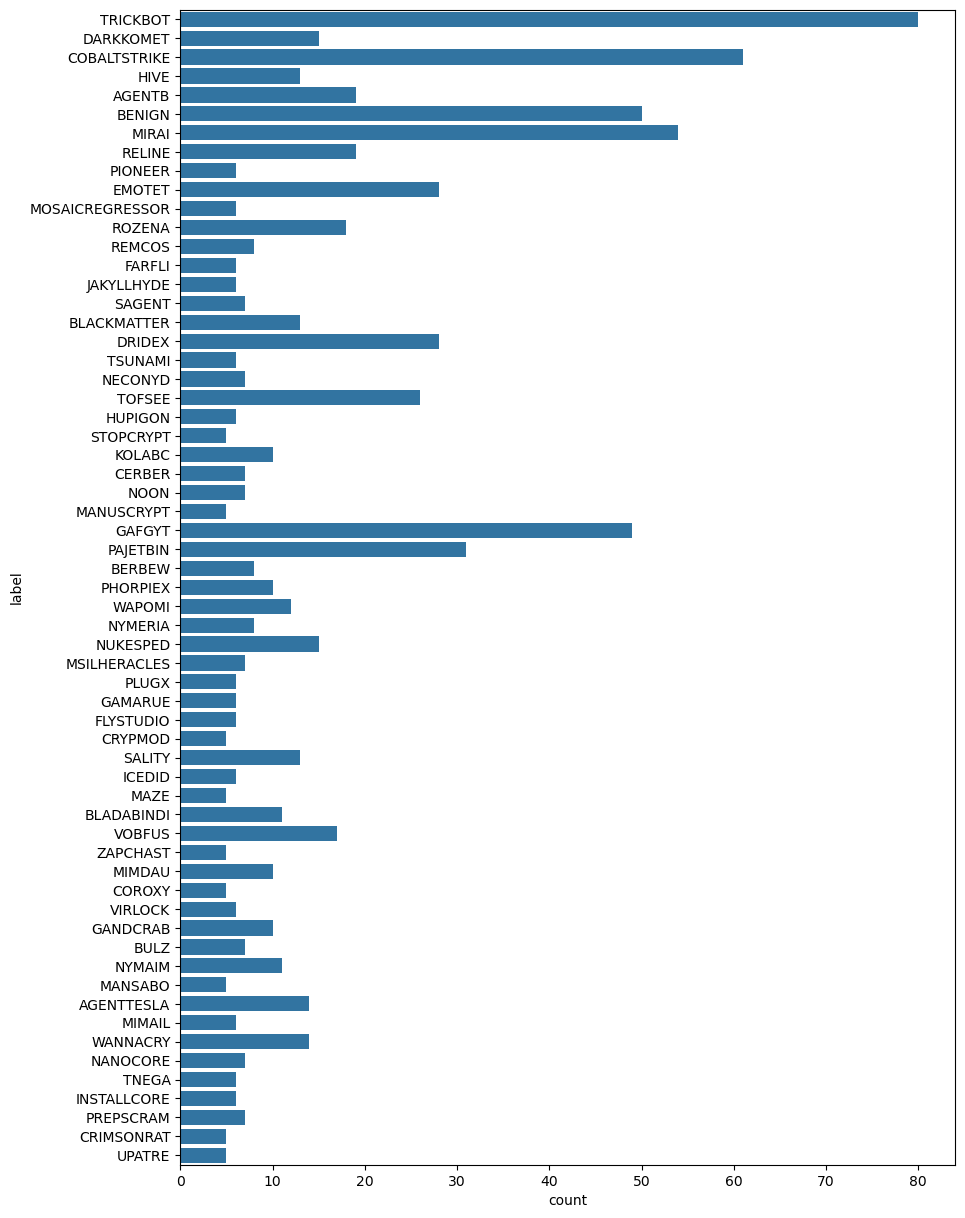

In [6]:
plt.figure(figsize = (10, 15))
sns.countplot(data=df["label"])

Save the updated data.

In [7]:
df.to_csv("../data/processed-data.csv", index=False)